In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv("Cars24_data.csv",index_col=0)

In [5]:
df

,Brand,Model,Year,Fuel_Type,Transmission,KM_Driven,Price,EMI_Price,Location
0,Renault,Kwid,2016,Petrol,Manual,843.67k km,2.35,"EMI ₹4,594/m","Tathawade, Pune"
1,Hyundai,i10,2013,Petrol,Manual,275.32k km,2.50,"EMI ₹8,293/m","Amanora Mall apex building, Pune"
2,Renault,Kwid,2016,Petrol,Manual,858.96k km,2.32,"EMI ₹4,528/m","Tathawade, Pune"
3,Maruti,Celerio,2015,Petrol,Auto,88.13k km,2.97,"EMI ₹6,614/m","Tathawade, Pune"
4,Maruti,Wagon,2018,CNG,Manual,1.3L km,3.51,"EMI ₹7,797/m","Tathawade, Pune"
...,...,...,...,...,...,...,...,...,...
152,Maruti,Alto,2022,Petrol,Manual,23.93k km,2.70,"EMI ₹4,766/m","GNB Mall, Raj Nagar Extension, Ghaziabad"
153,Nissan,MAGNITE,2021,Petrol,Manual,66.13k km,3.53,"EMI ₹6,231/m","Piyush Mahendra Mall, opp. Dussehra Ground, NI..."
154,Mahindra,Thar,2021,Petrol,Auto,32.82k km,8.61,"EMI ₹14,742/m","GNB Mall, Raj Nagar Extension, Ghaziabad"
155,Tata,NEXON,2018,Petrol,Manual,29.84k km,3.99,"EMI ₹7,043/m",Rajouri Garden


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         157 non-null    object 
 1   Model         157 non-null    object 
 2   Year          157 non-null    int64  
 3   Fuel_Type     157 non-null    object 
 4   Transmission  157 non-null    object 
 5   KM_Driven     157 non-null    object 
 6   Price         157 non-null    float64
 7   EMI_Price     155 non-null    object 
 8   Location      157 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 12.3+ KB


In [7]:
df.isnull().sum()

Brand           0
Model           0
Year            0
Fuel_Type       0
Transmission    0
KM_Driven       0
Price           0
EMI_Price       2
Location        0
dtype: int64

In [8]:
df["Price"]

0      2.35
1      2.50
2      2.32
3      2.97
4      3.51
       ... 
152    2.70
153    3.53
154    8.61
155    3.99
156    4.10
Name: Price, Length: 157, dtype: float64

# 1.Removing lack and crore and making it to int datatype using regex

In [9]:
import re
def convert_price(integer_value):
    if pd.isna(integer_value):
        return None
    integer_value = str(integer_value).lower().replace("₹","").replace(",","").strip()
    if "lakh" in integer_value:
        num = re.findall(r"[\d\.]+", integer_value)
        return float(num[0]) * 100000 if num else None
    else:
        num = re.findall(r"[\d\.]+", integer_value)
        return float(num[0]) * 100000 if num else None
df["Price_num"]=df["Price"].apply(convert_price)
df["Price_num"]

0      235000.0
1      250000.0
2      232000.0
3      297000.0
4      351000.0
         ...   
152    270000.0
153    353000.0
154    861000.0
155    399000.0
156    410000.0
Name: Price_num, Length: 157, dtype: float64

## Removing k and l from km diven column 

In [10]:
import re

def convert_km_driven(value):
    if pd.isna(value):
        return None
    value = str(value).lower().replace(",", "").strip()
    match = re.match(r"([0-9.]+)\s*([kl]?)", value)
    if match:
        num, suffix = match.groups()
        num = float(num)
        if suffix == "k":
            return int(num * 1000)
        elif suffix == "l":
            return int(num * 100000)
        else:
            return int(num)
    return None

df["KM_Driven_num"] = df["KM_Driven"].apply(convert_km_driven)

In [11]:
df["KM_Driven_num"]

0      843670
1      275320
2      858960
3       88130
4      130000
        ...  
152     23930
153     66130
154     32820
155     29840
156     28470
Name: KM_Driven_num, Length: 157, dtype: int64

## Removing emi and /m 

In [12]:
import re
def clean_emi_price(value):
    if pd.isna(value):
        return None
    value = str(value).lower()
    value = re.sub(r'emi', '', value)
    value = re.sub(r'/m', '', value)
    value = re.sub(r'₹', '', value)
    value = value.replace(',', '').strip()
    match = re.search(r'[0-9.]+', value)
    return float(match.group()) if match else None
df['EMI_Price_clean'] = df['EMI_Price'].apply(clean_emi_price)
df['EMI_Price_clean']

0       4594.0
1       8293.0
2       4528.0
3       6614.0
4       7797.0
        ...   
152     4766.0
153     6231.0
154    14742.0
155     7043.0
156     7238.0
Name: EMI_Price_clean, Length: 157, dtype: float64

In [13]:
df

,Brand,Model,Year,Fuel_Type,Transmission,KM_Driven,Price,EMI_Price,Location,Price_num,KM_Driven_num,EMI_Price_clean
0,Renault,Kwid,2016,Petrol,Manual,843.67k km,2.35,"EMI ₹4,594/m","Tathawade, Pune",235000.0,843670,4594.0
1,Hyundai,i10,2013,Petrol,Manual,275.32k km,2.50,"EMI ₹8,293/m","Amanora Mall apex building, Pune",250000.0,275320,8293.0
2,Renault,Kwid,2016,Petrol,Manual,858.96k km,2.32,"EMI ₹4,528/m","Tathawade, Pune",232000.0,858960,4528.0
3,Maruti,Celerio,2015,Petrol,Auto,88.13k km,2.97,"EMI ₹6,614/m","Tathawade, Pune",297000.0,88130,6614.0
4,Maruti,Wagon,2018,CNG,Manual,1.3L km,3.51,"EMI ₹7,797/m","Tathawade, Pune",351000.0,130000,7797.0
...,...,...,...,...,...,...,...,...,...,...,...,...
152,Maruti,Alto,2022,Petrol,Manual,23.93k km,2.70,"EMI ₹4,766/m","GNB Mall, Raj Nagar Extension, Ghaziabad",270000.0,23930,4766.0
153,Nissan,MAGNITE,2021,Petrol,Manual,66.13k km,3.53,"EMI ₹6,231/m","Piyush Mahendra Mall, opp. Dussehra Ground, NI...",353000.0,66130,6231.0
154,Mahindra,Thar,2021,Petrol,Auto,32.82k km,8.61,"EMI ₹14,742/m","GNB Mall, Raj Nagar Extension, Ghaziabad",861000.0,32820,14742.0
155,Tata,NEXON,2018,Petrol,Manual,29.84k km,3.99,"EMI ₹7,043/m",Rajouri Garden,399000.0,29840,7043.0


In [14]:
df = df.drop('Price', axis=1)

In [15]:
df = df.drop('KM_Driven', axis=1)

In [16]:
df = df.drop('EMI_Price', axis=1)

In [17]:
df

,Brand,Model,Year,Fuel_Type,Transmission,Location,Price_num,KM_Driven_num,EMI_Price_clean
0,Renault,Kwid,2016,Petrol,Manual,"Tathawade, Pune",235000.0,843670,4594.0
1,Hyundai,i10,2013,Petrol,Manual,"Amanora Mall apex building, Pune",250000.0,275320,8293.0
2,Renault,Kwid,2016,Petrol,Manual,"Tathawade, Pune",232000.0,858960,4528.0
3,Maruti,Celerio,2015,Petrol,Auto,"Tathawade, Pune",297000.0,88130,6614.0
4,Maruti,Wagon,2018,CNG,Manual,"Tathawade, Pune",351000.0,130000,7797.0
...,...,...,...,...,...,...,...,...,...
152,Maruti,Alto,2022,Petrol,Manual,"GNB Mall, Raj Nagar Extension, Ghaziabad",270000.0,23930,4766.0
153,Nissan,MAGNITE,2021,Petrol,Manual,"Piyush Mahendra Mall, opp. Dussehra Ground, NI...",353000.0,66130,6231.0
154,Mahindra,Thar,2021,Petrol,Auto,"GNB Mall, Raj Nagar Extension, Ghaziabad",861000.0,32820,14742.0
155,Tata,NEXON,2018,Petrol,Manual,Rajouri Garden,399000.0,29840,7043.0


In [18]:
df.to_csv("Cars24_data_clean.csv",index=True)

In [19]:
df

,Brand,Model,Year,Fuel_Type,Transmission,Location,Price_num,KM_Driven_num,EMI_Price_clean
0,Renault,Kwid,2016,Petrol,Manual,"Tathawade, Pune",235000.0,843670,4594.0
1,Hyundai,i10,2013,Petrol,Manual,"Amanora Mall apex building, Pune",250000.0,275320,8293.0
2,Renault,Kwid,2016,Petrol,Manual,"Tathawade, Pune",232000.0,858960,4528.0
3,Maruti,Celerio,2015,Petrol,Auto,"Tathawade, Pune",297000.0,88130,6614.0
4,Maruti,Wagon,2018,CNG,Manual,"Tathawade, Pune",351000.0,130000,7797.0
...,...,...,...,...,...,...,...,...,...
152,Maruti,Alto,2022,Petrol,Manual,"GNB Mall, Raj Nagar Extension, Ghaziabad",270000.0,23930,4766.0
153,Nissan,MAGNITE,2021,Petrol,Manual,"Piyush Mahendra Mall, opp. Dussehra Ground, NI...",353000.0,66130,6231.0
154,Mahindra,Thar,2021,Petrol,Auto,"GNB Mall, Raj Nagar Extension, Ghaziabad",861000.0,32820,14742.0
155,Tata,NEXON,2018,Petrol,Manual,Rajouri Garden,399000.0,29840,7043.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            157 non-null    object 
 1   Model            157 non-null    object 
 2   Year             157 non-null    int64  
 3   Fuel_Type        157 non-null    object 
 4   Transmission     157 non-null    object 
 5   Location         157 non-null    object 
 6   Price_num        157 non-null    float64
 7   KM_Driven_num    157 non-null    int64  
 8   EMI_Price_clean  155 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 12.3+ KB


In [21]:
df.isnull().sum()

Brand              0
Model              0
Year               0
Fuel_Type          0
Transmission       0
Location           0
Price_num          0
KM_Driven_num      0
EMI_Price_clean    2
dtype: int64

In [22]:
df = df.dropna(subset=['Fuel_Type', 'Price_num']).reset_index(drop=True)

In [23]:
df

,Brand,Model,Year,Fuel_Type,Transmission,Location,Price_num,KM_Driven_num,EMI_Price_clean
0,Renault,Kwid,2016,Petrol,Manual,"Tathawade, Pune",235000.0,843670,4594.0
1,Hyundai,i10,2013,Petrol,Manual,"Amanora Mall apex building, Pune",250000.0,275320,8293.0
2,Renault,Kwid,2016,Petrol,Manual,"Tathawade, Pune",232000.0,858960,4528.0
3,Maruti,Celerio,2015,Petrol,Auto,"Tathawade, Pune",297000.0,88130,6614.0
4,Maruti,Wagon,2018,CNG,Manual,"Tathawade, Pune",351000.0,130000,7797.0
...,...,...,...,...,...,...,...,...,...
152,Maruti,Alto,2022,Petrol,Manual,"GNB Mall, Raj Nagar Extension, Ghaziabad",270000.0,23930,4766.0
153,Nissan,MAGNITE,2021,Petrol,Manual,"Piyush Mahendra Mall, opp. Dussehra Ground, NI...",353000.0,66130,6231.0
154,Mahindra,Thar,2021,Petrol,Auto,"GNB Mall, Raj Nagar Extension, Ghaziabad",861000.0,32820,14742.0
155,Tata,NEXON,2018,Petrol,Manual,Rajouri Garden,399000.0,29840,7043.0


In [24]:
df["Price_num"].mean().round(2)

678420.38

# 1.Taking numerical data 

In [25]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
numerical_data = df[numerical_cols]
numerical_data


,Year,Price_num,KM_Driven_num,EMI_Price_clean
0,2016,235000.0,843670,4594.0
1,2013,250000.0,275320,8293.0
2,2016,232000.0,858960,4528.0
3,2015,297000.0,88130,6614.0
4,2018,351000.0,130000,7797.0
...,...,...,...,...
152,2022,270000.0,23930,4766.0
153,2021,353000.0,66130,6231.0
154,2021,861000.0,32820,14742.0
155,2018,399000.0,29840,7043.0


In [26]:
numerical_data.head()

,Year,Price_num,KM_Driven_num,EMI_Price_clean
0,2016,235000.0,843670,4594.0
1,2013,250000.0,275320,8293.0
2,2016,232000.0,858960,4528.0
3,2015,297000.0,88130,6614.0
4,2018,351000.0,130000,7797.0


## Univariate analysis

In [27]:
numerical_data["Price_num"]

0      235000.0
1      250000.0
2      232000.0
3      297000.0
4      351000.0
         ...   
152    270000.0
153    353000.0
154    861000.0
155    399000.0
156    410000.0
Name: Price_num, Length: 157, dtype: float64

In [28]:
price_num=df[["Price_num"]]
price_num

,Price_num
0,235000.0
1,250000.0
2,232000.0
3,297000.0
4,351000.0
...,...
152,270000.0
153,353000.0
154,861000.0
155,399000.0


In [29]:
price_num["Price_num"].describe().round()

count        157.0
mean      678420.0
std       634142.0
min       149000.0
25%       320000.0
50%       443000.0
75%       764000.0
max      4275000.0
Name: Price_num, dtype: float64

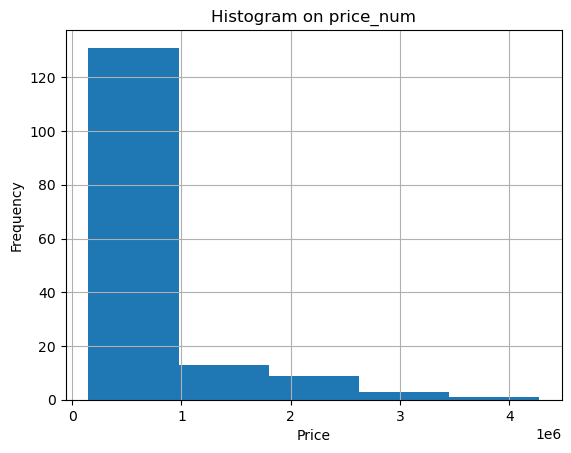

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(numerical_data["Price_num"],bins=5)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram on price_num")
plt.grid()
plt.show()

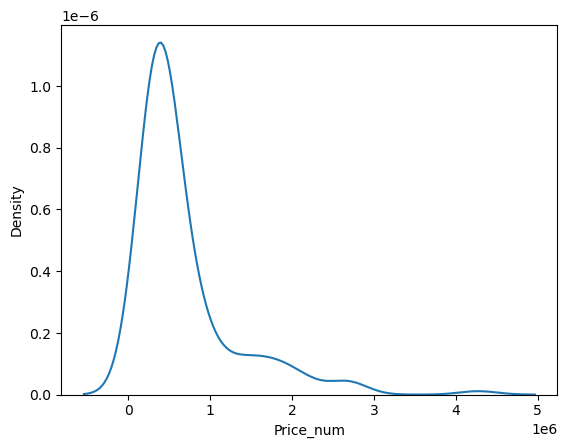

In [31]:
sns.kdeplot(numerical_data["Price_num"])
plt.show()

### Observation 
- 1.From this visualization we can conclude that there are around 480 cars price range between 1_00_000 to 13_00000 are sold more.
- 2.And cars having price from 35_00_000 to 49_00_000 are sold around 0.1%.
- 3.And cars having price range above 50_00_000 are less which is negligible

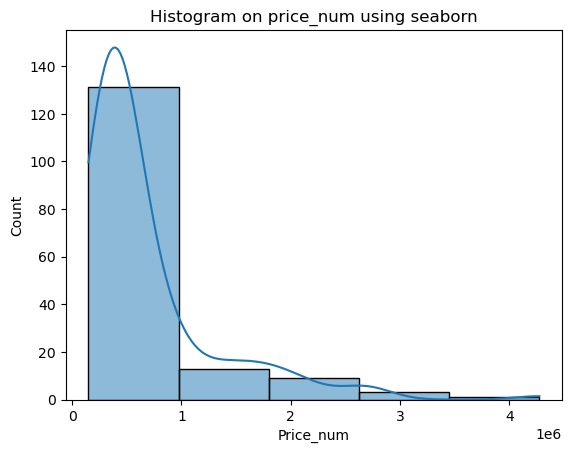

In [32]:
sns.histplot(numerical_data["Price_num"], bins=5, kde=True)
plt.title("Histogram on price_num using seaborn")
plt.show()

In [33]:
numerical_data["KM_Driven_num"]

0      843670
1      275320
2      858960
3       88130
4      130000
        ...  
152     23930
153     66130
154     32820
155     29840
156     28470
Name: KM_Driven_num, Length: 157, dtype: int64

In [34]:
km_num=df["KM_Driven_num"]
km_num

0      843670
1      275320
2      858960
3       88130
4      130000
        ...  
152     23930
153     66130
154     32820
155     29840
156     28470
Name: KM_Driven_num, Length: 157, dtype: int64

In [35]:
numerical_data["KM_Driven_num"].describe().round()

count        157.0
mean      123238.0
std       249422.0
min         6620.0
25%        34380.0
50%        62210.0
75%        86320.0
max      2110000.0
Name: KM_Driven_num, dtype: float64

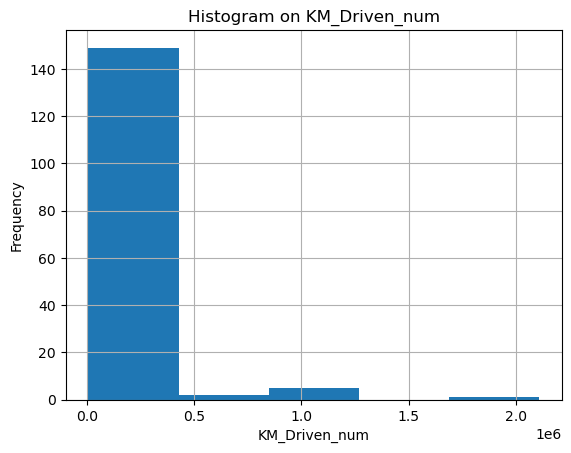

In [36]:
plt.hist(numerical_data["KM_Driven_num"],bins=5)
plt.xlabel("KM_Driven_num")
plt.ylabel("Frequency")
plt.title("Histogram on KM_Driven_num")
plt.grid()
plt.show()

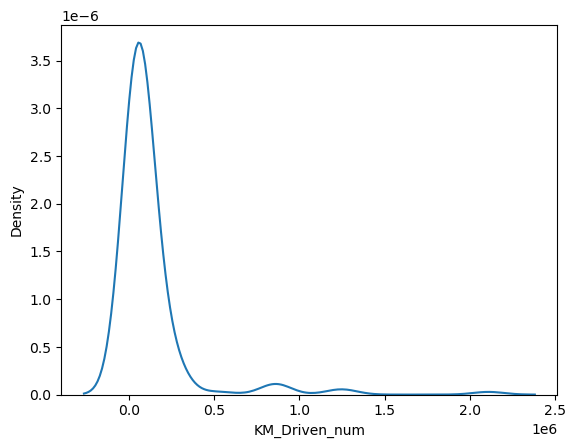

In [37]:
sns.kdeplot(numerical_data["KM_Driven_num"])
plt.show()

### Observation
- From this observation we can say that there are around 550 cars are driven in range of 1000km to 15000km .
- And there are around 0.1%  cars driven from 33000km  to 47000km showing that high-mileage cars are rare
- The distribution is highly skewed towards cars with lower kilometers driven

In [38]:
numerical_data["EMI_Price_clean"]

0       4594.0
1       8293.0
2       4528.0
3       6614.0
4       7797.0
        ...   
152     4766.0
153     6231.0
154    14742.0
155     7043.0
156     7238.0
Name: EMI_Price_clean, Length: 157, dtype: float64

In [39]:
numerical_data["EMI_Price_clean"].describe()

count      155.000000
mean     13411.864516
std      11654.881019
min       2913.000000
25%       7016.500000
50%       8597.000000
75%      14636.500000
max      73198.000000
Name: EMI_Price_clean, dtype: float64

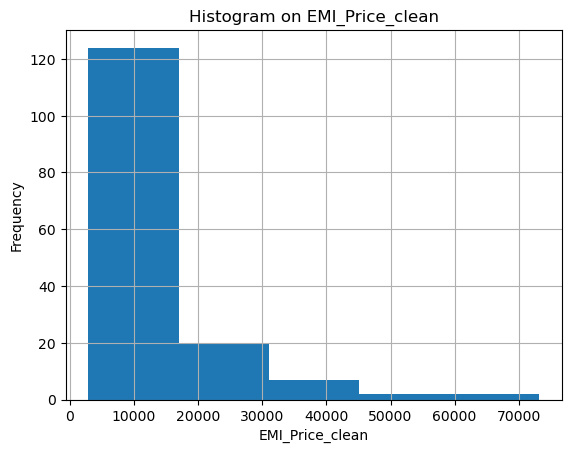

In [40]:
plt.hist(numerical_data["EMI_Price_clean"],bins=5)
plt.xlabel("EMI_Price_clean")
plt.ylabel("Frequency")
plt.title("Histogram on EMI_Price_clean")
plt.grid()
plt.show()

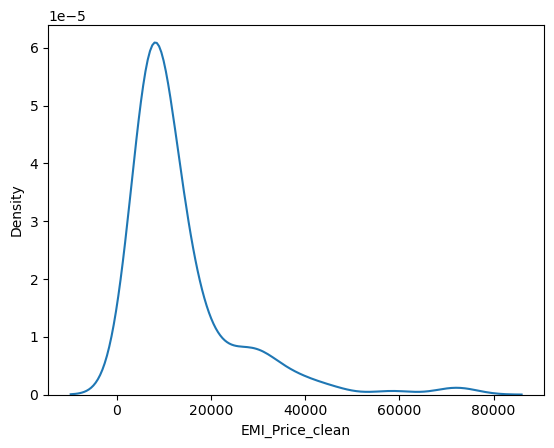

In [41]:
sns.kdeplot(numerical_data["EMI_Price_clean"])
plt.show()

### Observation
- From this observation we can say that most cars about 480 have been taken on emi between 10,000/m to 30,000/m.
- only very small percent about 0.1% cars have been taken on emi range between 1,25,000/m to 1,53,000/m
- There are zero cars whose emi is in between 90_00_000 to 125_00_000 which means the cars are taken by cash  or zero emi
- The distribution is highly skewed towards cars with lower EMI_Price

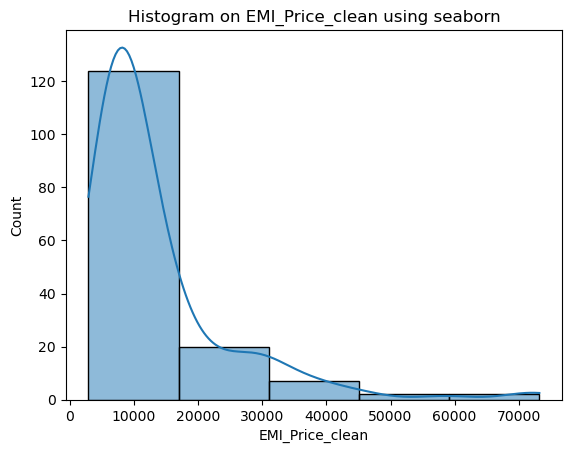

In [42]:
sns.histplot(numerical_data["EMI_Price_clean"], bins=5, kde=True)
plt.title("Histogram on EMI_Price_clean using seaborn")
plt.show()

# Bivariate Analysis on Numerical data
### Analysis on car price on km_driven

In [43]:
Car_price_Km=numerical_data[["Price_num","KM_Driven_num"]]
Car_price_Km

,Price_num,KM_Driven_num
0,235000.0,843670
1,250000.0,275320
2,232000.0,858960
3,297000.0,88130
4,351000.0,130000
...,...,...
152,270000.0,23930
153,353000.0,66130
154,861000.0,32820
155,399000.0,29840


In [44]:
Car_price_Km.max()

Price_num        4275000.0
KM_Driven_num    2110000.0
dtype: float64

In [45]:
max_km_price = Car_price_Km[Car_price_Km["KM_Driven_num"] == Car_price_Km["KM_Driven_num"].max()]
max_km_price

,Price_num,KM_Driven_num
35,309000.0,2110000


In [46]:
min_km_price = Car_price_Km[Car_price_Km["KM_Driven_num"] == Car_price_Km["KM_Driven_num"].min()]
min_km_price

,Price_num,KM_Driven_num
91,885000.0,6620


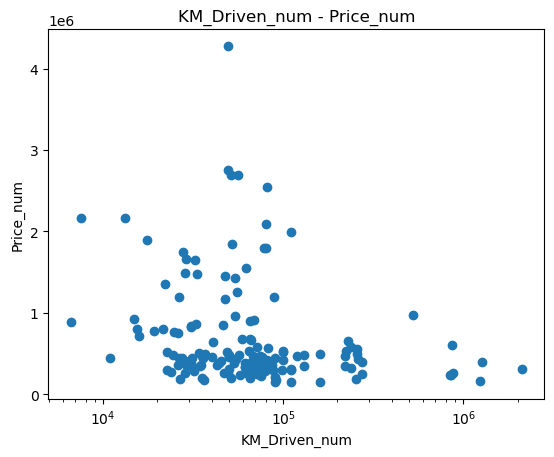

In [47]:
plt.scatter(Car_price_Km["KM_Driven_num"],Car_price_Km["Price_num"])
plt.xscale('log')
plt.title("KM_Driven_num - Price_num")
plt.xlabel("KM_Driven_num")
plt.ylabel("Price_num")
plt.show()

### Observation 
- From this graph we can say that most of the car price range between (1_00_000 to 3_00_000) are less driven.
- And there are zero cars sold driven in range between (30,000km to 60,000km)
- the distribution is highly skewed towards cars with lower price and lower km_driven

## Analysis on price_num and EMI_price

In [48]:
Car_price_emi=numerical_data[["Price_num","EMI_Price_clean"]]
Car_price_emi

,Price_num,EMI_Price_clean
0,235000.0,4594.0
1,250000.0,8293.0
2,232000.0,4528.0
3,297000.0,6614.0
4,351000.0,7797.0
...,...,...
152,270000.0,4766.0
153,353000.0,6231.0
154,861000.0,14742.0
155,399000.0,7043.0


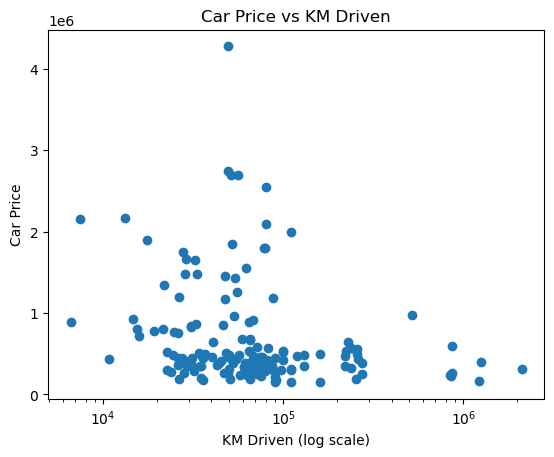

In [49]:
plt.scatter(Car_price_Km["KM_Driven_num"], Car_price_Km["Price_num"])
plt.xscale('log')
plt.title("Car Price vs KM Driven")
plt.xlabel("KM Driven (log scale)")
plt.ylabel("Car Price")
plt.show()


# Observation
The scatter plot shows that car price generally decreases as the kilometers driven increase, indicating depreciation with higher usage.

Most cars are concentrated between 10,000 km and 20,000 km, suggesting the dataset mainly contains moderately used vehicles.

A few outliers exist with very high prices despite large mileage, possibly representing luxury or premium models.

The log scale on the x-axis effectively spreads the data, revealing that low-driven cars tend to have higher prices overall

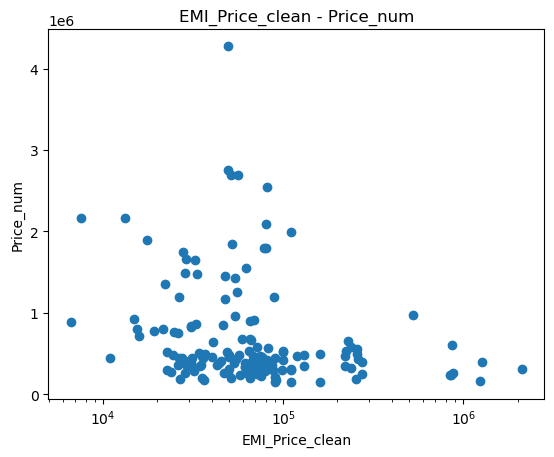

In [50]:
plt.scatter(Car_price_Km["KM_Driven_num"],Car_price_Km["Price_num"])
plt.xscale('log')
plt.title("EMI_Price_clean - Price_num")
plt.xlabel("EMI_Price_clean")
plt.ylabel("Price_num")
plt.show()

In [51]:
max_price_emi = Car_price_emi[Car_price_emi["EMI_Price_clean"] == Car_price_emi["EMI_Price_clean"].max()]
max_price_emi

,Price_num,EMI_Price_clean
49,4275000.0,73198.0


In [52]:
min_price_emi = Car_price_emi[Car_price_emi["EMI_Price_clean"] == Car_price_emi["EMI_Price_clean"].min()]
min_price_emi

,Price_num,EMI_Price_clean
69,149000.0,2913.0


In [53]:
total_cars=len(Car_price_emi)
total_cars

157

In [54]:
null_count=Car_price_emi["EMI_Price_clean"].isnull().sum()
null_count

2

In [55]:
per_nan=(null_count/total_cars)*100
per_nan

1.2738853503184715

In [56]:
price_emi_nan = Car_price_emi[Car_price_emi["EMI_Price_clean"].isnull()]
price_emi_nan

,Price_num,EMI_Price_clean
86,150000.0,NaN
123,2550000.0,NaN


# Observation
- from this 18 EMI_Price which are NAN we can say that these cars are cheap in pirce which are taken by cash 

# 2.Taking categorical data

In [57]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_data = df[categorical_cols]
categorical_data.head()

,Brand,Model,Fuel_Type,Transmission,Location
0,Renault,Kwid,Petrol,Manual,"Tathawade, Pune"
1,Hyundai,i10,Petrol,Manual,"Amanora Mall apex building, Pune"
2,Renault,Kwid,Petrol,Manual,"Tathawade, Pune"
3,Maruti,Celerio,Petrol,Auto,"Tathawade, Pune"
4,Maruti,Wagon,CNG,Manual,"Tathawade, Pune"


In [58]:
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         157 non-null    object
 1   Model         157 non-null    object
 2   Fuel_Type     157 non-null    object
 3   Transmission  157 non-null    object
 4   Location      157 non-null    object
dtypes: object(5)
memory usage: 6.3+ KB


## Univarite on Categorical

In [59]:
categorical_data["Brand"].value_counts()

Brand
Maruti        36
Hyundai       28
Tata          20
Honda         12
Mahindra      10
Renault        7
Volkswagen     7
KIA            7
Ford           6
Skoda          4
Toyota         4
Datsun         4
Landrover      3
Mercedes       3
Nissan         3
Audi           1
Jeep           1
BMW            1
Name: count, dtype: int64

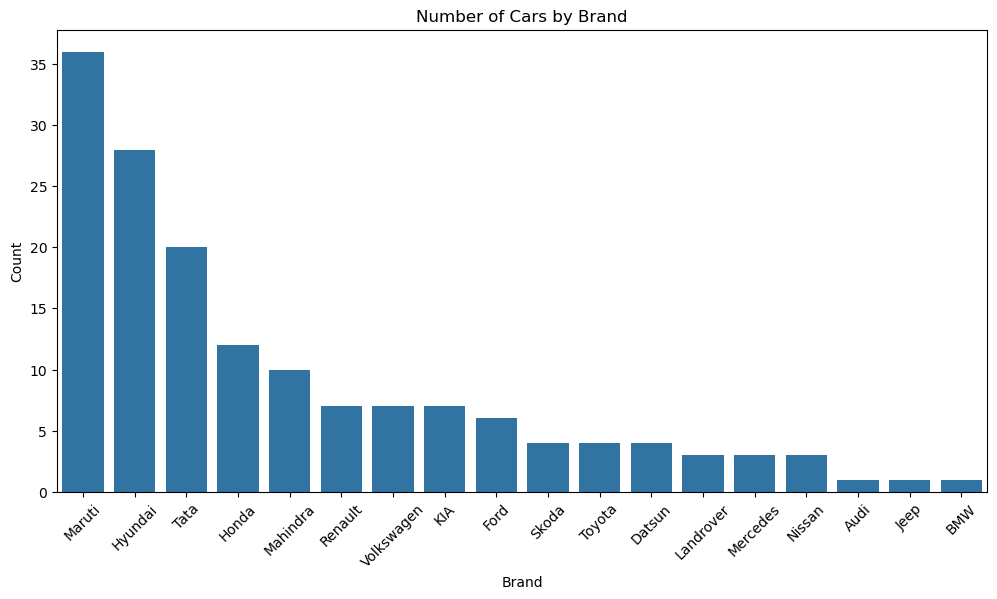

In [60]:
plt.figure(figsize=(12,6))
sns.countplot(data=categorical_data, x='Brand', order=categorical_data['Brand'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Number of Cars by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

## Observation
- From this graph we can say that Maruti and Hyundai is having larger number of cars for sale compare to other car brands

In [61]:
categorical_data["Model"].value_counts()

Model
Wagon      9
Tiago      7
Celerio    7
Grand      7
Kwid       5
          ..
GRAND      1
Etios      1
TUV300     1
Vento      1
Thar       1
Name: count, Length: 62, dtype: int64

In [62]:
categorical_data["Fuel_Type"].value_counts()

Fuel_Type
Petrol    123
Diesel     28
CNG         6
Name: count, dtype: int64

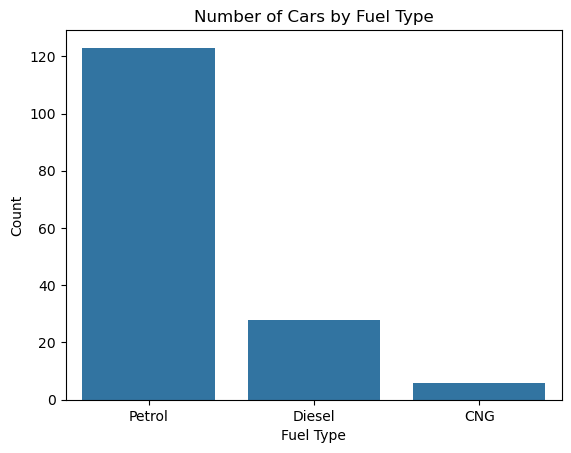

In [63]:
sns.countplot(data=categorical_data, x='Fuel_Type', order=categorical_data['Fuel_Type'].value_counts().index)
plt.title('Number of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

### Observation
- As we can see number of petrol cars around(400) are more compare to diesel and CNG

In [64]:
categorical_data["Fuel_Type"].isnull().sum()

0

In [65]:
categorical_data["Transmission"].value_counts()

Transmission
Manual    109
Auto       48
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


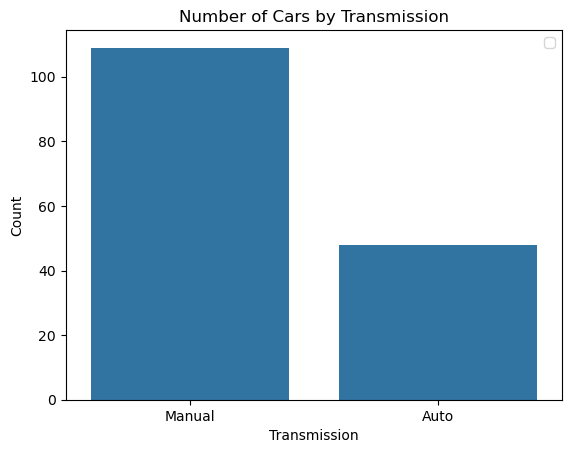

In [66]:
sns.countplot(data=categorical_data, x='Transmission', order=categorical_data['Transmission'].value_counts().index)
plt.title('Number of Cars by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.legend()
plt.show()

### Observation
- From this graph we can say that there are around (400) manual cars and around (160) Auto cars 

In [67]:
categorical_data["Location"].value_counts()

Location
Malhar Mega Mall, Vijay Nagar, Indore                           20
Tathawade, Pune                                                 15
Kompally, Hyderabad                                             11
CARS24 ELITE Hub, Surajpur Site-4, Greater Noida                10
M3M Urbana, Golf Course Ext., Gurugram                           7
Gandhi Nagar                                                     7
Upperpally, Attapur, Hyderabad                                   6
CARS24 ELITE Hub, Andheri East, Mumbai                           6
Sector-18, Noida                                                 6
Thakur Village Kandivali E Mumbai                                6
Bellahalli, Bengaluru                                            5
GNB Mall, Raj Nagar Extension, Ghaziabad                         5
Goregaon, Mumbai                                                 4
Gaur City mall, Multilevel parking, Greater Noida                4
CARS24 ELITE Hub, Malibu Town, Sector 47             

In [68]:
categorical_data

,Brand,Model,Fuel_Type,Transmission,Location
0,Renault,Kwid,Petrol,Manual,"Tathawade, Pune"
1,Hyundai,i10,Petrol,Manual,"Amanora Mall apex building, Pune"
2,Renault,Kwid,Petrol,Manual,"Tathawade, Pune"
3,Maruti,Celerio,Petrol,Auto,"Tathawade, Pune"
4,Maruti,Wagon,CNG,Manual,"Tathawade, Pune"
...,...,...,...,...,...
152,Maruti,Alto,Petrol,Manual,"GNB Mall, Raj Nagar Extension, Ghaziabad"
153,Nissan,MAGNITE,Petrol,Manual,"Piyush Mahendra Mall, opp. Dussehra Ground, NI..."
154,Mahindra,Thar,Petrol,Auto,"GNB Mall, Raj Nagar Extension, Ghaziabad"
155,Tata,NEXON,Petrol,Manual,Rajouri Garden


## Bivariate analysis on categorical

### Analysis on fule_type and brands

In [69]:
car_models_Fuel=categorical_data[["Brand","Fuel_Type"]].value_counts()
car_models_Fuel

Brand       Fuel_Type
Maruti      Petrol       32
Hyundai     Petrol       25
Tata        Petrol       14
Honda       Petrol       12
KIA         Petrol        6
Renault     Petrol        6
Mahindra    Petrol        6
Tata        Diesel        4
Maruti      CNG           4
Mahindra    Diesel        4
Volkswagen  Petrol        4
Datsun      Petrol        4
Landrover   Diesel        3
Nissan      Petrol        3
Volkswagen  Diesel        3
Toyota      Petrol        3
Ford        Diesel        3
Skoda       Petrol        3
Ford        Petrol        3
Hyundai     Diesel        3
Tata        CNG           2
Mercedes    Diesel        2
Renault     Diesel        1
KIA         Diesel        1
Skoda       Diesel        1
Mercedes    Petrol        1
BMW         Diesel        1
Toyota      Diesel        1
Jeep        Petrol        1
Audi        Diesel        1
Name: count, dtype: int64

In [70]:
car_brand_fuel=pd.crosstab(categorical_data["Brand"],categorical_data["Fuel_Type"])
car_brand_fuel

Fuel_Type,CNG,Diesel,Petrol
Brand,,,
Audi,0,1,0
BMW,0,1,0
Datsun,0,0,4
Ford,0,3,3
Honda,0,0,12
Hyundai,0,3,25
Jeep,0,0,1
KIA,0,1,6
Landrover,0,3,0


Text(0, 0.5, 'Count')

<Figure size 1200x1000 with 0 Axes>

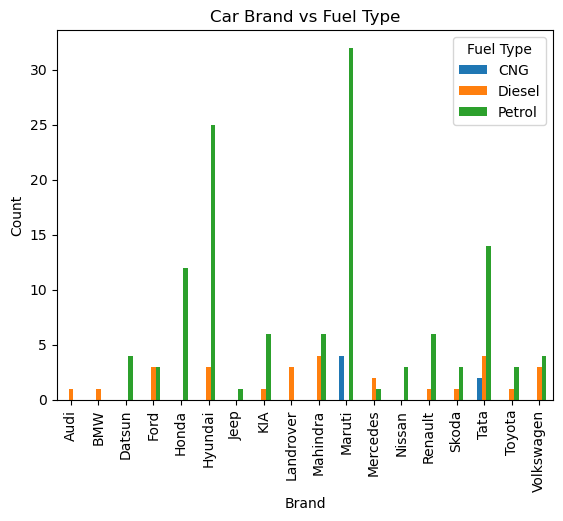

In [71]:
plt.figure(figsize=(12,10))
car_brand_fuel.plot(kind='bar')
plt.title('Car Brand vs Fuel Type')
plt.legend(title='Fuel Type')
plt.xlabel('Brand')
plt.ylabel('Count')

## Obseravation
- From this graph we can say that Maruti and Hyundia brand is having high number of cars having fuel type petrol
- BMW,Chevrolet,ISUZU,JAGUAR,LANDROVER and VOLVE this brands only have diesel fuel cars
- And also there are less number of cars which uses CNG

## Brands and there transmission

In [72]:
car_brand_transmission=categorical_data[["Brand","Transmission"]].value_counts()
car_brand_transmission

Brand       Transmission
Maruti      Manual          25
Hyundai     Manual          24
Tata        Manual          15
Maruti      Auto            11
Honda       Manual           8
Renault     Manual           7
Ford        Manual           6
Mahindra    Manual           5
Tata        Auto             5
Mahindra    Auto             5
KIA         Manual           4
Volkswagen  Manual           4
Hyundai     Auto             4
Honda       Auto             4
Landrover   Auto             3
KIA         Auto             3
Mercedes    Auto             3
Nissan      Manual           3
Skoda       Manual           3
Datsun      Manual           3
Volkswagen  Auto             3
Toyota      Auto             2
            Manual           2
BMW         Auto             1
Jeep        Auto             1
Skoda       Auto             1
Datsun      Auto             1
Audi        Auto             1
Name: count, dtype: int64

In [73]:
car_brand_transmission=pd.crosstab(categorical_data["Brand"],categorical_data["Transmission"])
car_brand_transmission

Transmission,Auto,Manual
Brand,,
Audi,1,0
BMW,1,0
Datsun,1,3
Ford,0,6
Honda,4,8
Hyundai,4,24
Jeep,1,0
KIA,3,4
Landrover,3,0


Text(0, 0.5, 'Count')

<Figure size 1200x800 with 0 Axes>

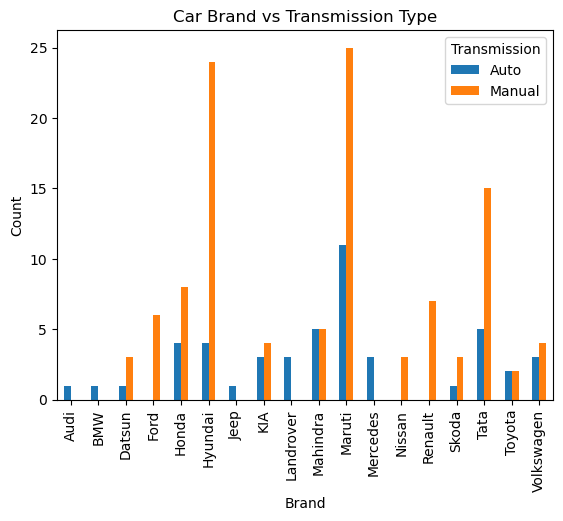

In [74]:
plt.figure(figsize=(12,8))
car_brand_transmission.plot(kind='bar')
plt.title('Car Brand vs Transmission Type')
plt.xlabel('Brand')
plt.ylabel('Count')

## Obseravation
- From this graph we can say that Maruti and Hyundia brand is having high number of cars having transmission manual
- BMW,Chevrolet,ISUZU,JAGUAR,LANDROVER and VOLVE this brands only have Auto transmission 
- And also there are less number of cars which have Auto transmission

# Car Brand and there location

In [75]:
car_brand_location=categorical_data[["Brand","Location"]].value_counts()
car_brand_location

Brand       Location                                          
Hyundai     Malhar Mega Mall, Vijay Nagar, Indore                 7
Maruti      Tathawade, Pune                                       6
Mahindra    CARS24 ELITE Hub, Surajpur Site-4, Greater Noida      5
Maruti      Malhar Mega Mall, Vijay Nagar, Indore                 4
Tata        M3M Urbana, Golf Course Ext., Gurugram                4
                                                                 ..
KIA         Kompally, Hyderabad                                   1
            CARS24 ELITE Hub, Malibu Town, Sector 47              1
            Bachupally, Hyderabad                                 1
Jeep        CARS24 ELITE Hub, Andheri East, Mumbai                1
Volkswagen  Whitefield Main Road, Bhoruka Tech Park, Bengaluru    1
Name: count, Length: 112, dtype: int64

## Car Model and there fuel type

In [76]:
car_models_Fuel=pd.crosstab(categorical_data["Model"],categorical_data["Fuel_Type"])
car_models_Fuel

Fuel_Type,CNG,Diesel,Petrol
Model,,,
3,0,1,0
Alto,0,0,4
Amaze,0,0,2
Ameo,0,1,1
BR,0,0,1
...,...,...,...
XUV,0,1,0
XUV700,0,0,4
Xcent,0,0,1


## Bivariate analysis on cars data

In [77]:
df

,Brand,Model,Year,Fuel_Type,Transmission,Location,Price_num,KM_Driven_num,EMI_Price_clean
0,Renault,Kwid,2016,Petrol,Manual,"Tathawade, Pune",235000.0,843670,4594.0
1,Hyundai,i10,2013,Petrol,Manual,"Amanora Mall apex building, Pune",250000.0,275320,8293.0
2,Renault,Kwid,2016,Petrol,Manual,"Tathawade, Pune",232000.0,858960,4528.0
3,Maruti,Celerio,2015,Petrol,Auto,"Tathawade, Pune",297000.0,88130,6614.0
4,Maruti,Wagon,2018,CNG,Manual,"Tathawade, Pune",351000.0,130000,7797.0
...,...,...,...,...,...,...,...,...,...
152,Maruti,Alto,2022,Petrol,Manual,"GNB Mall, Raj Nagar Extension, Ghaziabad",270000.0,23930,4766.0
153,Nissan,MAGNITE,2021,Petrol,Manual,"Piyush Mahendra Mall, opp. Dussehra Ground, NI...",353000.0,66130,6231.0
154,Mahindra,Thar,2021,Petrol,Auto,"GNB Mall, Raj Nagar Extension, Ghaziabad",861000.0,32820,14742.0
155,Tata,NEXON,2018,Petrol,Manual,Rajouri Garden,399000.0,29840,7043.0


## Car Brands and their year

In [78]:
car_price_brand=df[["Brand","Year"]]
car_price_brand

,Brand,Year
0,Renault,2016
1,Hyundai,2013
2,Renault,2016
3,Maruti,2015
4,Maruti,2018
...,...,...
152,Maruti,2022
153,Nissan,2021
154,Mahindra,2021
155,Tata,2018


# Calculating car brands and there price 

In [79]:
car_price_brand=df[["Price_num","Brand"]]
car_price_brand

,Price_num,Brand
0,235000.0,Renault
1,250000.0,Hyundai
2,232000.0,Renault
3,297000.0,Maruti
4,351000.0,Maruti
...,...,...
152,270000.0,Maruti
153,353000.0,Nissan
154,861000.0,Mahindra
155,399000.0,Tata


In [80]:
car_price_brand_avg=df.groupby("Brand")["Price_num"].mean().round(2).sort_values(ascending=False)
car_price_brand_avg

Brand
Landrover     3238333.33
Mercedes      2410000.00
Jeep          1650000.00
Audi          1550000.00
Mahindra      1541900.00
BMW           1425000.00
KIA            988428.57
Toyota         756750.00
Tata           665000.00
Skoda          536250.00
Hyundai        497500.00
Honda          451250.00
Maruti         437527.78
Nissan         427333.33
Ford           395333.33
Volkswagen     365571.43
Renault        287428.57
Datsun         202750.00
Name: Price_num, dtype: float64

In [81]:
top10_brands = car_price_brand_avg.head(10)
top10_brands

Brand
Landrover    3238333.33
Mercedes     2410000.00
Jeep         1650000.00
Audi         1550000.00
Mahindra     1541900.00
BMW          1425000.00
KIA           988428.57
Toyota        756750.00
Tata          665000.00
Skoda         536250.00
Name: Price_num, dtype: float64

In [82]:
top10_df = top10_brands.reset_index()
top10_df

,Brand,Price_num
0,Landrover,3238333.33
1,Mercedes,2410000.00
2,Jeep,1650000.00
3,Audi,1550000.00
4,Mahindra,1541900.00
5,BMW,1425000.00
6,KIA,988428.57
7,Toyota,756750.00
8,Tata,665000.00
9,Skoda,536250.00


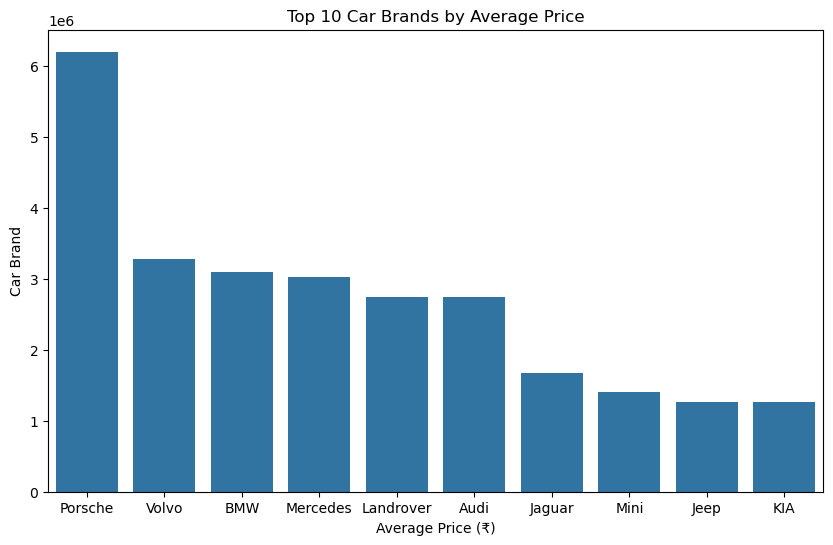

In [80]:
plt.figure(figsize=(10,6))
sns.barplot(x="Brand", y="Price_num", data=top10_df)
plt.title("Top 10 Car Brands by Average Price")
plt.xlabel("Average Price (₹)")
plt.ylabel("Car Brand")
plt.show()

## Observation
- From this observation we can conclude that Porsche is having highest price which is above 60lakh

# Analysis on Brands and the KM Driven

In [81]:
car_KM_Driven_brand=df[["Brand","KM_Driven_num"]]
car_KM_Driven_brand

,Brand,KM_Driven_num
0,Mercedes,69600
1,Hyundai,15120
2,Volkswagen,32490
3,Hyundai,248790
4,Hyundai,45030
...,...,...
566,Maruti,39560
567,Maruti,72370
568,Skoda,69960
569,Maruti,77430


In [82]:
car_KM_Driven_brand_avg=df.groupby("Brand")["KM_Driven_num"].mean().round(2).sort_values(ascending=False)
car_KM_Driven_brand_avg

Brand
Fiat          3190000.00
Volkswagen     733706.50
Mahindra       349906.15
Renault        285071.95
Maruti         155354.13
Hyundai        148066.92
Chevrolet      125771.43
Audi            85278.33
Ford            83721.61
KIA             83497.67
ISUZU           78540.00
Datsun          74348.00
Volvo           71480.00
Honda           68577.05
Skoda           66593.00
Tata            64155.26
Toyota          62742.31
Jaguar          57160.00
Mercedes        56062.00
Jeep            51198.57
Nissan          49801.11
Landrover       49320.00
BMW             46160.00
Mini            39130.00
MG              36320.71
Porsche         31400.00
Name: KM_Driven_num, dtype: float64

In [83]:
top10_brands = car_KM_Driven_brand_avg.head(10).round(2)
top10_brands

Brand
Fiat          3190000.00
Volkswagen     733706.50
Mahindra       349906.15
Renault        285071.95
Maruti         155354.13
Hyundai        148066.92
Chevrolet      125771.43
Audi            85278.33
Ford            83721.61
KIA             83497.67
Name: KM_Driven_num, dtype: float64

In [84]:
top10_df = top10_brands.round(2).reset_index()
top10_df

,Brand,KM_Driven_num
0,Fiat,3190000.00
1,Volkswagen,733706.50
2,Mahindra,349906.15
3,Renault,285071.95
4,Maruti,155354.13
5,Hyundai,148066.92
6,Chevrolet,125771.43
7,Audi,85278.33
8,Ford,83721.61
9,KIA,83497.67


C:\Users\GORAKH\AppData\Local\Temp\ipykernel_13360\22138160.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Brand", y="KM_Driven_num", data=top10_df, palette="mako")


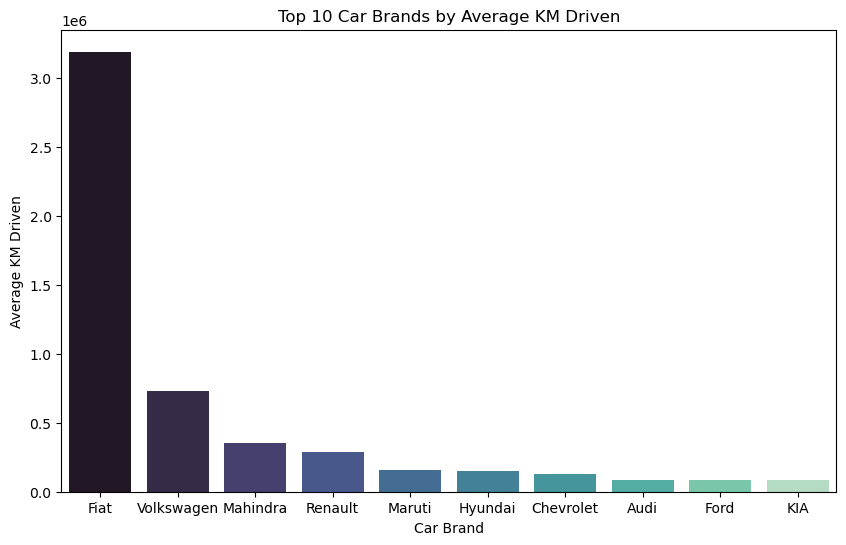

In [85]:
plt.figure(figsize=(10,6))
sns.barplot(x="Brand", y="KM_Driven_num", data=top10_df, palette="mako")
plt.title("Top 10 Car Brands by Average KM Driven")
plt.xlabel("Car Brand")
plt.ylabel("Average KM Driven")
plt.show()

# Observation
- From this observation the avg KM of FIAT car brand is more than all the other brands which is above 30,000 Km
- 

# fuel_type and price

In [86]:
car_price_fuel=df[["Price_num","Fuel_Type"]]
car_price_fuel

,Price_num,Fuel_Type
0,3200000.0,Diesel
1,753000.0,Petrol
2,438000.0,Petrol
3,377000.0,Petrol
4,272000.0,Petrol
...,...,...
566,410000.0,Petrol
567,150000.0,Petrol
568,1424000.0,Petrol
569,199000.0,CNG


In [87]:
car_price_fuel_avg=df.groupby("Fuel_Type")["Price_num"].mean().round(2).sort_values(ascending=False)
car_price_fuel_avg

Fuel_Type
Diesel    1065713.33
Petrol     682960.49
CNG        480062.50
Name: Price_num, dtype: float64

In [88]:
df

,Brand,Model,Year,Fuel_Type,Transmission,Location,Price_num,KM_Driven_num,EMI_Price_clean
0,Mercedes,Benz,2016,Diesel,Auto,"CARS24 ELITE Hub, Magarpatta, Mundhwa",3200000.0,69600,69576.0
1,Hyundai,NEW,2021,Petrol,Auto,"Amanora Mall apex building, Pune",753000.0,15120,14725.0
2,Volkswagen,Ameo,2016,Petrol,Manual,"Tathawade, Pune",438000.0,32490,8566.0
3,Hyundai,Xcent,2016,Petrol,Manual,"Tathawade, Pune",377000.0,248790,7363.0
4,Hyundai,i10,2012,Petrol,Auto,"Tathawade, Pune",272000.0,45030,12815.0
...,...,...,...,...,...,...,...,...,...
566,Maruti,Swift,2019,Petrol,Manual,Sector 9 Gurugram,410000.0,39560,8011.0
567,Maruti,Alto,2014,Petrol,Manual,Bhanpur Bhopal Madhya Pradesh,150000.0,72370,3950.0
568,Skoda,KUSHAQ,2023,Petrol,Auto,Shahpura Bhopal,1424000.0,69960,27105.0
569,Maruti,Wagon,2016,CNG,Manual,Shahjahanabad Bhopal Madhya Pradesh,199000.0,77430,3890.0


In [89]:
top10_brands = car_price_fuel_avg.head(10).round(2)
top10_brands

Fuel_Type
Diesel    1065713.33
Petrol     682960.49
CNG        480062.50
Name: Price_num, dtype: float64

In [90]:
top10_df = top10_brands.reset_index().round(2)
top10_df

,Fuel_Type,Price_num
0,Diesel,1065713.33
1,Petrol,682960.49
2,CNG,480062.50


C:\Users\GORAKH\AppData\Local\Temp\ipykernel_13360\3738759252.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Fuel_Type", y="Price_num", data=top10_df, palette="mako")


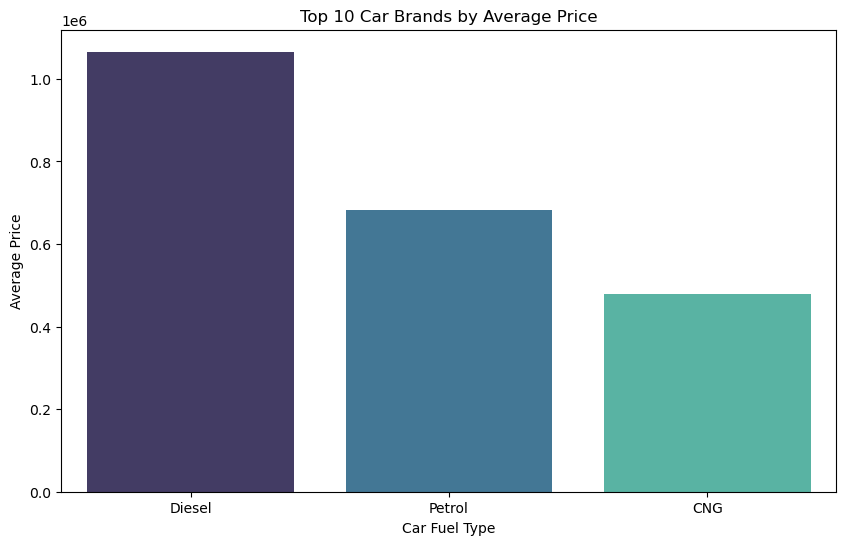

In [91]:
plt.figure(figsize=(10,6))
sns.barplot(x="Fuel_Type", y="Price_num", data=top10_df, palette="mako")
plt.title("Top 10 Car Brands by Average Price")
plt.xlabel("Car Fuel Type")
plt.ylabel("Average Price")
plt.show()

## Observation
- From this observation we can conclude that the avg mean price of diesel cars are more than Petrol and CNG cars.
- So there are more Diesel cars for sale 